In [2]:
import pandas as pd
import numpy as np
df=pd.read_csv('hotel_bookings.csv')
df

,is_canceled,deposit_type,lead_time,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr
0,0,No Deposit,105.0,2,5,NaN,0,0,1,0,131.50
1,0,No Deposit,303.0,2,2,NaN,0,0,0,0,73.95
2,0,No Deposit,33.0,2,3,0.0,0,0,0,0,NaN
3,0,No Deposit,48.0,0,1,0.0,0,0,1,0,80.30
4,0,No Deposit,216.0,4,7,0.0,0,0,2,0,60.90
...,...,...,...,...,...,...,...,...,...,...,...
19995,1,Non Refund,89.0,2,2,0.0,0,0,0,0,62.00
19996,1,Non Refund,101.0,0,3,0.0,0,0,0,0,130.00
19997,1,Non Refund,277.0,1,2,0.0,0,0,0,0,100.00
19998,1,No Deposit,0.0,0,1,0.0,0,0,0,0,209.00


y변수 : is_canceled

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     20000 non-null  int64  
 1   deposit_type                    20000 non-null  object 
 2   lead_time                       19995 non-null  float64
 3   stays_in_weekend_nights         20000 non-null  int64  
 4   stays_in_week_nights            20000 non-null  int64  
 5   is_repeated_guest               19642 non-null  float64
 6   previous_cancellations          20000 non-null  int64  
 7   previous_bookings_not_canceled  20000 non-null  int64  
 8   booking_changes                 20000 non-null  int64  
 9   days_in_waiting_list            20000 non-null  int64  
 10  adr                             18937 non-null  float64
dtypes: float64(3), int64(7), object(1)
memory usage: 1.7+ MB


<AxesSubplot:xlabel='is_canceled', ylabel='count'>

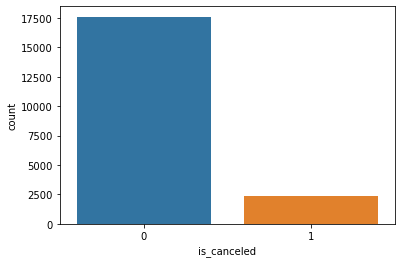

In [4]:
import seaborn as sns
sns.countplot(x='is_canceled', data=df)

In [5]:
df.isna().sum()

is_canceled                          0
deposit_type                         0
lead_time                            5
stays_in_weekend_nights              0
stays_in_week_nights                 0
is_repeated_guest                  358
previous_cancellations               0
previous_bookings_not_canceled       0
booking_changes                      0
days_in_waiting_list                 0
adr                               1063
dtype: int64

In [6]:
df.dropna(subset=['lead_time'], inplace=True)
df.isna().sum()

is_canceled                          0
deposit_type                         0
lead_time                            0
stays_in_weekend_nights              0
stays_in_week_nights                 0
is_repeated_guest                  358
previous_cancellations               0
previous_bookings_not_canceled       0
booking_changes                      0
days_in_waiting_list                 0
adr                               1063
dtype: int64

In [7]:
df['is_repeated_guest'].unique()

array([nan,  0.,  1.])

<AxesSubplot:xlabel='is_repeated_guest', ylabel='count'>

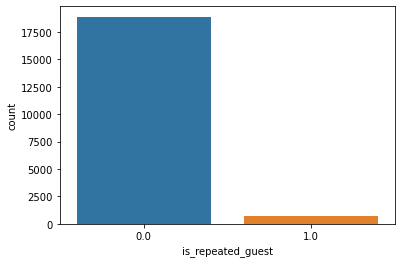

In [8]:
import seaborn as sns
sns.countplot(x='is_repeated_guest', data=df)

최빈값은 0

In [9]:
df['is_repeated_guest']=df['is_repeated_guest'].fillna(0)
df.isna().sum()

is_canceled                          0
deposit_type                         0
lead_time                            0
stays_in_weekend_nights              0
stays_in_week_nights                 0
is_repeated_guest                    0
previous_cancellations               0
previous_bookings_not_canceled       0
booking_changes                      0
days_in_waiting_list                 0
adr                               1063
dtype: int64

#adr 결측치는 deposit_type 별 adr평균으로

In [10]:
fill_mean_func=lambda g: g.fillna(g.mean())
df=df.groupby('deposit_type').apply(fill_mean_func)
df.index=df.index.droplevel(0)
df.sort_index(inplace=True)

df.isna().sum()

C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_12024/3270320884.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  fill_mean_func=lambda g: g.fillna(g.mean())


is_canceled                       0
deposit_type                      0
lead_time                         0
stays_in_weekend_nights           0
stays_in_week_nights              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
days_in_waiting_list              0
adr                               0
dtype: int64

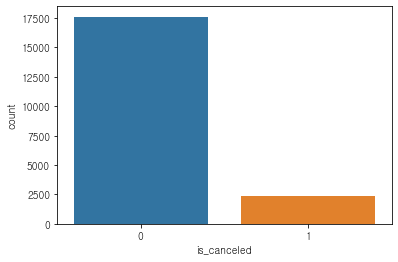

In [11]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_path="C:/Windows/Fonts/NGULIM.TTF"
font=font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

sns.countplot(x='is_canceled', data=df)
plt.show()

In [12]:
df=pd.get_dummies(df)
from imblearn.over_sampling import RandomOverSampler, SMOTE
import time

X=df.drop(columns=['is_canceled'])
y=df['is_canceled']

start=time.time()
ros=RandomOverSampler(random_state=42)
X_ro, y_ro=ros.fit_resample(X, y)
print(time.time()-start)

0.04587268829345703


In [13]:
start=time.time()
sm=SMOTE(random_state=42)
X_sm, y_sm=sm.fit_resample(X, y)
print(time.time()-start)

0.08486270904541016


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

start=time.time()
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, stratify=y, random_state=100)
clf=RandomForestClassifier(n_estimators=100, min_samples_split=10)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
pred=clf.predict(X_test)
print(classification_report(y_test, pred))
print(time.time()-start)

0.9333583395848962
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      3519
           1       0.98      0.44      0.60       480

    accuracy                           0.93      3999
   macro avg       0.95      0.72      0.78      3999
weighted avg       0.93      0.93      0.92      3999

4.078694105148315


In [16]:
start=time.time()
X_ro_train, X_ro_test, y_ro_train, y_ro_test=train_test_split(X_ro, y_ro, test_size=0.2, stratify=y_ro, random_state=100)
clf_ro=RandomForestClassifier(n_estimators=100, min_samples_split=10, random_state=100)
clf_ro.fit(X_ro_train, y_ro_train)

#정확도
print(clf_ro.score(X_ro_train, y_ro_train))
print(classification_report(y_ro_test, clf_ro.predict(X_ro_test)))
print(time.time()-start)

0.9853651605569764
              precision    recall  f1-score   support

           0       0.98      0.93      0.95      3519
           1       0.94      0.98      0.96      3519

    accuracy                           0.95      7038
   macro avg       0.96      0.95      0.95      7038
weighted avg       0.96      0.95      0.95      7038

7.139724016189575


RandomOverSampling이 속도 측면에서는 빠름